In [1]:
# !pip install sdv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'age': [35, 45, 28, 50, 60, 22, 70, 43, 28, 33, 55],
    'gender': ['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'household_size': [3, 2, 1, 4, 2, 5, 2, 1, 4, 2, 5,],
    'annual_income': [60000, 80000, 40000, 100000, 75000, 150000, 45000, 28000, 42000, 38000, 120000],
    'cleaning_frequency': ['Daily', 'Weekly', 'Twice a week', 'Every few days', 'Weekly', 'Daily', 'Twice a week', 'Daily', 'Weekly', 'Every few days', 'Every few days'],
    'willingness_to_adopt_robotics': ['High', 'Medium', 'Low', 'High', 'Medium','Medium', 'Low','High','Low', 'High', 'Medium'],
    'preferred_features': ['Self-charging', 'Mapping & Navigation', 'Voice Control', 'Pet Hair Removal', 'Allergen Filtration', 'Automatic Software Update', 'Smart Home Integration', 'Auto Scheduling', 'App Connectivity', 'Noise Levels','UV-C Sterilization',],
    'customer_satisfaction': [4.5, 4.2, 3.8, 4.7, 4.3, 2.2, 3.5, 4.2, 5, 3.8, 5.0]
}

cdf = pd.DataFrame(data)

In [3]:
cdf.head()

,customer_id,age,gender,household_size,annual_income,cleaning_frequency,willingness_to_adopt_robotics,preferred_features,customer_satisfaction
0,1,35,Female,3,60000,Daily,High,Self-charging,4.5
1,2,45,Male,2,80000,Weekly,Medium,Mapping & Navigation,4.2
2,3,28,Male,1,40000,Twice a week,Low,Voice Control,3.8
3,4,50,Female,4,100000,Every few days,High,Pet Hair Removal,4.7
4,5,60,Female,2,75000,Weekly,Medium,Allergen Filtration,4.3


In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11 non-null     int64  
 1   age                            11 non-null     int64  
 2   gender                         11 non-null     object 
 3   household_size                 11 non-null     int64  
 4   annual_income                  11 non-null     int64  
 5   cleaning_frequency             11 non-null     object 
 6   willingness_to_adopt_robotics  11 non-null     object 
 7   preferred_features             11 non-null     object 
 8   customer_satisfaction          11 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 924.0+ bytes


In [5]:
# cdf.astype({
#     'annual_income': 'int64',
#     'cleaning_frequency': 'category',
#     'willingness_to_adopt_robotics': 'category',
#     'preferred_features': 'category',
# }).dtypes

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11 non-null     int64  
 1   age                            11 non-null     int64  
 2   gender                         11 non-null     object 
 3   household_size                 11 non-null     int64  
 4   annual_income                  11 non-null     int64  
 5   cleaning_frequency             11 non-null     object 
 6   willingness_to_adopt_robotics  11 non-null     object 
 7   preferred_features             11 non-null     object 
 8   customer_satisfaction          11 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 924.0+ bytes


In [7]:
cdf.head()

,customer_id,age,gender,household_size,annual_income,cleaning_frequency,willingness_to_adopt_robotics,preferred_features,customer_satisfaction
0,1,35,Female,3,60000,Daily,High,Self-charging,4.5
1,2,45,Male,2,80000,Weekly,Medium,Mapping & Navigation,4.2
2,3,28,Male,1,40000,Twice a week,Low,Voice Control,3.8
3,4,50,Female,4,100000,Every few days,High,Pet Hair Removal,4.7
4,5,60,Female,2,75000,Weekly,Medium,Allergen Filtration,4.3


In [8]:
# meta-data for the given dataframe..
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(cdf)

In [9]:
metadata.columns

{'customer_id': {'sdtype': 'id'},
 'age': {'sdtype': 'numerical'},
 'gender': {'sdtype': 'categorical'},
 'household_size': {'sdtype': 'numerical'},
 'annual_income': {'sdtype': 'unknown', 'pii': True},
 'cleaning_frequency': {'sdtype': 'unknown', 'pii': True},
 'willingness_to_adopt_robotics': {'sdtype': 'unknown', 'pii': True},
 'preferred_features': {'sdtype': 'unknown', 'pii': True},
 'customer_satisfaction': {'sdtype': 'numerical'}}

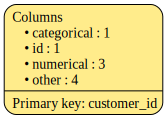

In [10]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png',
)

In [11]:
metadata.update_column(
    column_name='annual_income',
    sdtype='numerical',
)
metadata.update_column(
    column_name='cleaning_frequency',
    sdtype='categorical',
)
metadata.update_column(
    column_name='willingness_to_adopt_robotics',
    sdtype='categorical',
)
metadata.update_column(
    column_name='preferred_features',
    sdtype='categorical',
)
metadata.update_column(
    column_name='customer_id',
    sdtype='id'
)

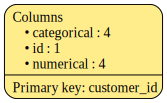

In [12]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png',
)

In [14]:
# ## save metadata

# metadata.save_to_json(filepath='metadata_v1.json')

In [15]:
### synthesizing data

In [23]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(cdf)

synthetic_data = synthesizer.sample(num_rows=2000)

In [24]:
synthetic_data

,customer_id,age,gender,household_size,annual_income,cleaning_frequency,willingness_to_adopt_robotics,preferred_features,customer_satisfaction
0,0,31,Female,2,75934,Twice a week,Medium,UV-C Sterilization,4.6
1,1,22,Female,1,28000,Twice a week,High,Voice Control,5.0
2,2,40,Female,1,28000,Weekly,Low,App Connectivity,2.7
3,3,32,Female,1,66210,Every few days,High,Smart Home Integration,3.7
4,4,41,Female,2,61485,Twice a week,Medium,Auto Scheduling,2.9
...,...,...,...,...,...,...,...,...,...
1995,1995,22,Male,1,28000,Every few days,High,Self-charging,3.1
1996,1996,22,Female,1,94174,Daily,Medium,Smart Home Integration,3.9
1997,1997,55,Male,2,35218,Every few days,High,Allergen Filtration,3.5
1998,1998,22,Female,1,118647,Weekly,High,Noise Levels,4.0


In [25]:
synthetic_data.customer_satisfaction.unique()

array([4.6, 5. , 2.7, 3.7, 2.9, 4. , 3.1, 4.2, 4.8, 3.3, 3.9, 2.8, 4.3,
       4.1, 2.6, 4.5, 3.8, 3.4, 2.5, 3.6, 3.2, 4.4, 3. , 3.5, 2.2, 4.9,
       4.7, 2.4, 2.3])

In [30]:
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('synthetic_data.csv')

In [33]:
df

,customer_id,age,gender,household_size,annual_income,cleaning_frequency,willingness_to_adopt_robotics,preferred_features,customer_satisfaction
0,0,31,Female,2,75934,Twice a week,Medium,UV-C Sterilization,4.6
1,1,22,Female,1,28000,Twice a week,High,Voice Control,5.0
2,2,40,Female,1,28000,Weekly,Low,App Connectivity,2.7
3,3,32,Female,1,66210,Every few days,High,Smart Home Integration,3.7
4,4,41,Female,2,61485,Twice a week,Medium,Auto Scheduling,2.9
...,...,...,...,...,...,...,...,...,...
1995,1995,22,Male,1,28000,Every few days,High,Self-charging,3.1
1996,1996,22,Female,1,94174,Daily,Medium,Smart Home Integration,3.9
1997,1997,55,Male,2,35218,Every few days,High,Allergen Filtration,3.5
1998,1998,22,Female,1,118647,Weekly,High,Noise Levels,4.0
